# ES13
## Noemi Baruffolo 5^AROB
### esercizio bitcoin

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
datiBitcoin = pd.read_csv("./BTC-Daily.csv")
datiBitcoin.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [24]:
btcHigh = datiBitcoin["high"].values[::-1]
btcLow = datiBitcoin["low"].values[::-1]
btcClose = datiBitcoin["close"].values[::-1]
btcVolume = datiBitcoin["Volume USD"].values[::-1]
tempo = datiBitcoin["unix"].values[::-1]

In [25]:
tempo

array([1417132800, 1417219200, 1417305600, ..., 1645920000, 1646006400,
       1646092800], dtype=int64)

### Esercizio
creare una figura con due grafici.
1. grafico che mostra l'andamento dei prezzi (high e low) giornalieri nel tempo
2. grafico che mostra (fa dispersione) se c'è correlazione tra il prezzo di chiusura e il volume

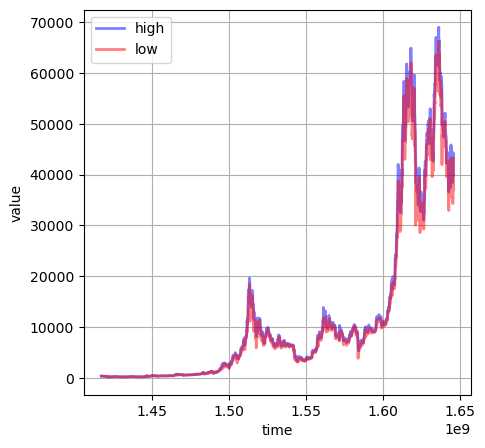

In [27]:
#1
fig, ax = plt.subplots(figsize = (5,5))
nDots = 100
x1 = tempo
y1 = btcHigh
x2 = tempo
y2 = btcLow
#size = np.random.uniform(100, 500, nDots)
ax.plot(x1, y1, label = "high",  c = "blue", alpha = 0.5, linewidth = 2, linestyle="-")
ax.plot(x2, y2, label = "low",  c = "red", alpha = 0.5, linewidth = 2, linestyle="-")
ax.set_xlabel("time")
ax.set_ylabel("value")
ax.legend()
ax.grid()
plt.show()

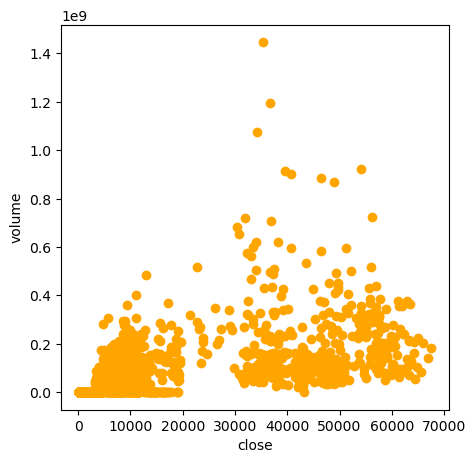

In [28]:
#2
x = btcClose
y = btcVolume

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(x, y, marker = "o", color = "orange") #conta l'ordine di scrittura, se metto la riga dopo, i pallini vanno in secondo piano

ax.set_xlabel("close")
ax.set_ylabel("volume")

plt.show()

Usando i dati del bitcoin creare i seguenti grafici nella stessa figura calcolare la variazione giornaliera del prezzo di chiusura e disegnare l'istogramma che rappresenti come sono distribuite le variazioni giornaliere del prezzo di chiusura creare un grafico che mostri se c'è correlazione tra la variazione di prezzo giornaliera e la differenza tra prezzo high e low di ciascun giorno 

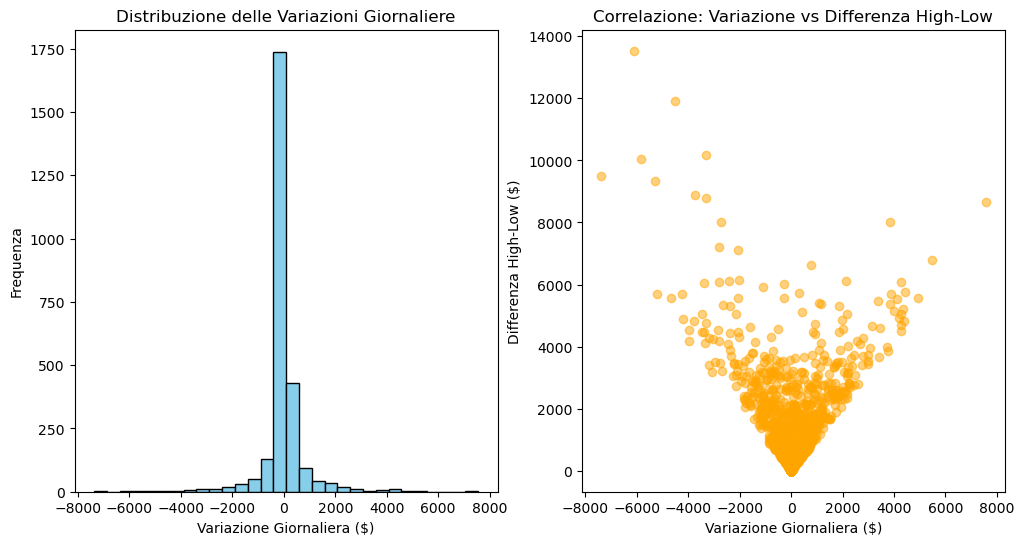

In [30]:
# Converti la colonna 'date' in formato datetime e ordina i dati in ordine cronologico
datiBitcoin['date'] = pd.to_datetime(datiBitcoin['date'])
datiBitcoin.sort_values(by='date', inplace=True)

# Calcola la variazione giornaliera del prezzo di chiusura
datiBitcoin['variazione_giornaliera'] = datiBitcoin['close'].diff()

# Calcola la differenza tra il prezzo massimo e minimo giornaliero
datiBitcoin['differenza_high_low'] = datiBitcoin['high'] - datiBitcoin['low']

# Crea la figura con due sottotrame (subplots)
plt.figure(figsize=(12, 6))

# Sottotrama 1: Istogramma della variazione giornaliera del prezzo di chiusura
plt.subplot(1, 2, 1)
plt.hist(datiBitcoin['variazione_giornaliera'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuzione delle Variazioni Giornaliere')
plt.xlabel('Variazione Giornaliera ($)')
plt.ylabel('Frequenza')

# Sottotrama 2: Scatter plot della variazione giornaliera vs differenza high-low
plt.subplot(1, 2, 2)
plt.scatter(
    datiBitcoin['variazione_giornaliera'], 
    datiBitcoin['differenza_high_low'], 
    alpha=0.5, 
    color='orange'
)
plt.title('Correlazione: Variazione vs Differenza High-Low')
plt.xlabel('Variazione Giornaliera ($)')
plt.ylabel('Differenza High-Low ($)')

plt.show()

### Pag.135 es.4
Simula 50 000 lanci di tre dadi, utilizzando numpy, e crea un istogramma che mostri la distribuzione della somma dei risultati dei tre dadi (per ogni lancio è calco- lata la somma dei tre dadi). Qual è il valore più probabile?

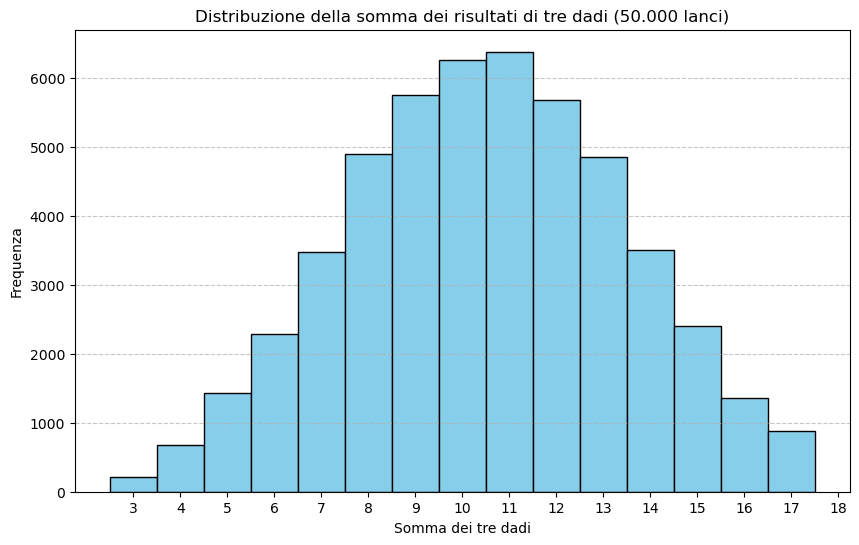

Il valore più probabile della somma è: 11


In [42]:
#4
# Simulazione di 50.000 lanci di tre dadi
numero_lanci = 50000
dado1 = np.random.randint(1, 7, numero_lanci)  # Primo dado, valori da 1 a 6
dado2 = np.random.randint(1, 7, numero_lanci)  # Secondo dado
dado3 = np.random.randint(1, 7, numero_lanci)  # Terzo dado
somme = dado1 + dado2 + dado3  # Calcolo della somma dei tre dadi per ogni lancio

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(somme, bins=range(3, 19), edgecolor='black', align='left', color='skyblue')
plt.title("Distribuzione della somma dei risultati di tre dadi (50.000 lanci)")
plt.xlabel("Somma dei tre dadi")
plt.ylabel("Frequenza")
plt.xticks(range(3, 19))  # Imposta i valori sull'asse x da 3 a 18
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiunge una griglia sull'asse y
plt.show()

# Determinazione del valore più probabile
valore_piu_probabile = np.bincount(somme).argmax()  # Trova la somma con frequenza maggiore
print(f"Il valore più probabile della somma è: {valore_piu_probabile}")


### Pag.135 es.7
Cerca su Internet quattro fotografie a tua scelta di forma quadrata e aventi la stessa dimensione in pixel: utilizza la funzione imshow() di matplotlib.pyplot per creare una figura che contenga un collage 2 × 2 delle quattro fotografie

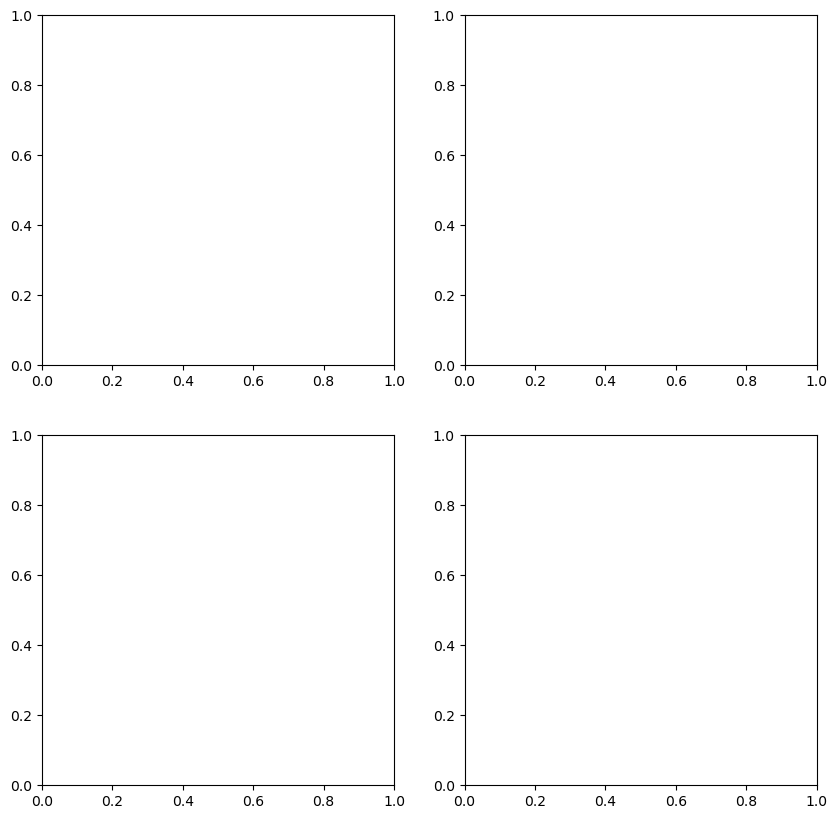

In [47]:
# Creazione della figura 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.show()